In [85]:
import pandas as pd
import math 
import random
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv (r'./normales.csv')
print(df.shape)
df = df.to_numpy()

(46, 2)


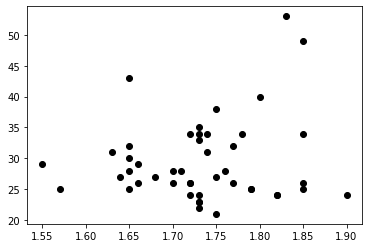

In [90]:
plt.plot(df[:,0], df[:,1], 'o', color='black')

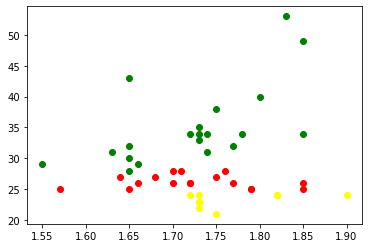

In [173]:
fc = np.array(test[0])
sc = np.array(test[1])
tc = np.array(test[2])

plt.plot(fc[:,0], fc[:,1], 'o', color='green')
plt.plot(sc[:,0], sc[:,1], 'o', color='yellow')
plt.plot(tc[:,0], tc[:,1], 'o', color='red')
plt.show()

In [172]:
test = kmeans(3, df)

Initial Centroids: 
{0: array([ 1.66, 29.  ]), 1: array([ 1.73, 22.  ]), 2: array([ 1.68, 27.  ])}
reached convergence..


In [171]:
def kmeans(K, x):
    
    for l in range(100):
        k = K
        samples = len(x)
        clusters = {}
        centroids = {}

        ##initiating centroids
        centroids_index = random.sample(range(0, samples), k)
        for i in range(k):
            centroids[i] = x[centroids_index[i]]
            clusters[i] = []

        print("Initial Centroids: ")
        print(centroids)            

        for data in x:
            euc_dist = []
            for j in range(k):
                euc_dist.append(np.linalg.norm(data - centroids[j]))
            clusters[euc_dist.index(min(euc_dist))].append(data)

        centroids_aux = recalculate_centroids(centroids, clusters, k)
        
        if(centroids== centroids_aux):
            print("reached convergence..")
            break 
        else: 
            centroids == centroids_aux
    
    return clusters 


In [31]:
def calculateDistance(x1,x2):
    dist = math.sqrt((x2[0]- x1[0])**2 + (x2[1] - x1[1])**2)
    return dist

In [123]:
def recalculate_centroids(centroids, clusters, k):
    """ Recalculates the centroid position based on the plot """
    for i in range(k):
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids